In [11]:
#Import necessary modules

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import random

from citipy import citipy

import time

from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_key

In [18]:
# Build base url + key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key


In [19]:
# Create a set of random latitudes and longitudes

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [27]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 19 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 13 | thompson
Processing Record 21 of Set 13 | new norfolk
Processing Record 22 of Set 13 | komsomolskiy
Processing Record 23 of Set 13 | khonuu
City not found. Skipping...
Processing Record 24 of Set 13 | tasiilaq
Processing Record 25 of Set 13 | lompoc
Processing Record 26 of Set 13 | vardo
Processing Record 27 of Set 13 | jamestown
Processing Record 28 of Set 13 | punta arenas
Processing Record 29 of Set 13 | puerto leguizamo
Processing Record 30 of Set 13 | sada
Processing Record 31 of Set 13 | port elizabeth
Processing Record 32 of Set 13 | oranjemund
Processing Record 33 of Set 13 | hithadhoo
Processing Record 34 of Set 13 | cape town
Processing Record 35 of Set 13 | awjilah
Processing Record 36 of Set 13 | wattegama
Processing Record 37 of Set 13 | wajima
Processing Record 38 of Set 13 | chuy
Processing Record 39 of Set 13 | coari
Processing Record 40 of Set 13 | lavrentiya


Processing Record 36 of Set 16 | longyearbyen
Processing Record 37 of Set 16 | zambezi
Processing Record 38 of Set 16 | karla
Processing Record 39 of Set 16 | sitka
Processing Record 40 of Set 16 | moussoro
Processing Record 41 of Set 16 | clyde river
Processing Record 42 of Set 16 | kalinovskaya
Processing Record 43 of Set 16 | north platte
Processing Record 44 of Set 16 | tubruq
City not found. Skipping...
Processing Record 45 of Set 16 | port-gentil
Processing Record 46 of Set 16 | parfino
Processing Record 47 of Set 16 | abu dhabi
Processing Record 48 of Set 16 | namatanai
Processing Record 49 of Set 16 | chokurdakh
Processing Record 50 of Set 16 | bonavista
Processing Record 1 of Set 17 | amahai
Processing Record 2 of Set 17 | marsh harbour
Processing Record 3 of Set 17 | yakeshi
Processing Record 4 of Set 17 | lyubymivka
Processing Record 5 of Set 17 | namtsy
Processing Record 6 of Set 17 | floro
Processing Record 7 of Set 17 | sentyabrskiy
City not found. Skipping...
Processing 

Processing Record 19 of Set 20 | herat
Processing Record 20 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 21 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 20 | morondava
Processing Record 23 of Set 20 | kieta
Processing Record 24 of Set 20 | santa rosa
Processing Record 25 of Set 20 | henties bay
Processing Record 26 of Set 20 | gibgos
Processing Record 27 of Set 20 | asbestos
Processing Record 28 of Set 20 | cabedelo
Processing Record 29 of Set 20 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 20 | omboue
Processing Record 31 of Set 20 | grindavik
Processing Record 32 of Set 20 | venice
Processing Record 33 of Set 20 | toamasina
Processing Record 34 of Set 20 | oussouye
Processing Record 35 of Set 20 | kerteh
City not found. Skipping...
Processing Record 36 of Set 20 | kuche
City not found. Skipping...
Processing Record 37 of Set 20 | touros
Processing Record 38 of Set 20 | san quintin
Processing Record 39 of Set 2

Processing Record 1 of Set 24 | champasak
Processing Record 2 of Set 24 | olafsvik
Processing Record 3 of Set 24 | alexandria
Processing Record 4 of Set 24 | pasni
Processing Record 5 of Set 24 | merauke
Processing Record 6 of Set 24 | kerki
City not found. Skipping...
Processing Record 7 of Set 24 | leningradskiy
Processing Record 8 of Set 24 | asheville
Processing Record 9 of Set 24 | ambon
Processing Record 10 of Set 24 | tateyama
Processing Record 11 of Set 24 | bilma
Processing Record 12 of Set 24 | kamina
Processing Record 13 of Set 24 | komsomolets
Processing Record 14 of Set 24 | kaseda
Processing Record 15 of Set 24 | atherton
Processing Record 16 of Set 24 | amga
Processing Record 17 of Set 24 | pallisa
Processing Record 18 of Set 24 | ranfurly
Processing Record 19 of Set 24 | bolshoy lug
Processing Record 20 of Set 24 | suntar
Processing Record 21 of Set 24 | bundaberg
Processing Record 22 of Set 24 | bonaventure
Processing Record 23 of Set 24 | port augusta
Processing Recor

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,17.76,62,40,2.30,CA,2022-04-18 04:19:19
1,New Norfolk,-42.7826,147.0587,59.92,45,100,1.99,AU,2022-04-18 04:19:20
2,Komsomolskiy,40.4272,71.7189,75.92,31,45,6.91,UZ,2022-04-18 04:19:20
3,Tasiilaq,65.6145,-37.6368,31.64,95,100,8.03,GL,2022-04-18 04:19:21
4,Lompoc,34.6391,-120.4579,54.57,88,0,9.22,US,2022-04-18 04:19:21
5,Vardo,70.3705,31.1107,39.60,91,100,10.71,NO,2022-04-18 04:19:22
6,Jamestown,42.0970,-79.2353,33.03,58,0,5.75,US,2022-04-18 04:18:07
7,Punta Arenas,-53.1500,-70.9167,41.11,87,75,3.44,CL,2022-04-18 04:19:22
8,Puerto Leguizamo,-0.1934,-74.7819,71.83,98,98,0.65,CO,2022-04-18 04:19:23
9,Sada,43.3562,-8.2580,56.28,89,100,8.05,ES,2022-04-18 04:19:23


In [29]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [30]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-04-18 04:19:19,55.7435,-97.8558,17.76,62,40,2.30
1,New Norfolk,AU,2022-04-18 04:19:20,-42.7826,147.0587,59.92,45,100,1.99
2,Komsomolskiy,UZ,2022-04-18 04:19:20,40.4272,71.7189,75.92,31,45,6.91
3,Tasiilaq,GL,2022-04-18 04:19:21,65.6145,-37.6368,31.64,95,100,8.03
4,Lompoc,US,2022-04-18 04:19:21,34.6391,-120.4579,54.57,88,0,9.22


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [3]:
# Read the ciities CSV File to get the data
file_path = "weather_data/cities.csv"
citi_data_df = pd.read_csv(file_path)

In [5]:
citi_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Thompson,CA,2022-04-18 04:19:19,55.7435,-97.8558,17.76,62,40,2.30
1,1,New Norfolk,AU,2022-04-18 04:19:20,-42.7826,147.0587,59.92,45,100,1.99
2,2,Komsomolskiy,UZ,2022-04-18 04:19:20,40.4272,71.7189,75.92,31,45,6.91
3,3,Tasiilaq,GL,2022-04-18 04:19:21,65.6145,-37.6368,31.64,95,100,8.03
4,4,Lompoc,US,2022-04-18 04:19:21,34.6391,-120.4579,54.57,88,0,9.22


In [27]:
#Extract relevant fields from the dataframe for plotting
lats = citi_data_df["Lat"]
max_temps = citi_data_df["Max Temp"]
humidity = citi_data_df["Humidity"]
cloudiness = citi_data_df["Cloudiness"]
wind_speed = citi_data_df["Wind Speed"]

In [25]:
#Import time module
import time
#Get today's date in seconds
today = time.time()
today

1650492731.3232522

In [15]:
today = time.strftime("%x")
today

'04/20/22'

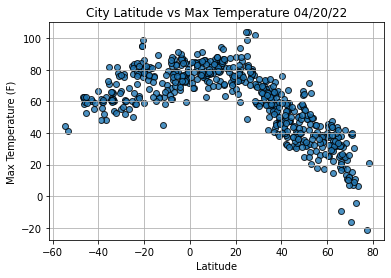

In [20]:
#Build the scatter plot for latitude vs max temp
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graphs properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#ave the Figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

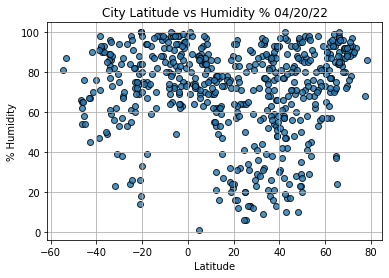

In [22]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graphs properties
plt.title(f"City Latitude vs Humidity % "+time.strftime("%x"))
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#ave the Figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

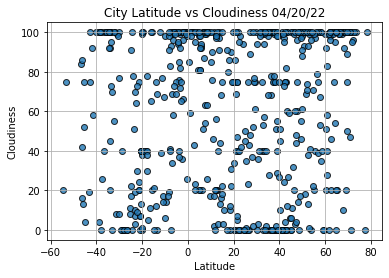

In [23]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graphs properties
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#ave the Figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

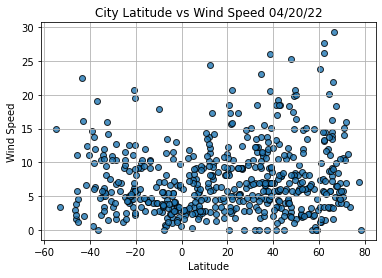

In [28]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graphs properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#ave the Figure
plt.savefig("weather_data/Fig34.png")

#show plot
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = citi_data_df.loc[(citi_data_df["Lat"] >= 0)]
southern_hemi_df = citi_data_df.loc[(citi_data_df["Lat"] < 0)]

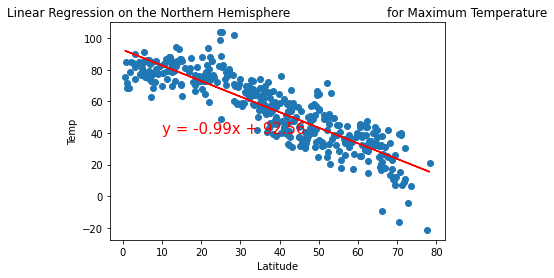

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

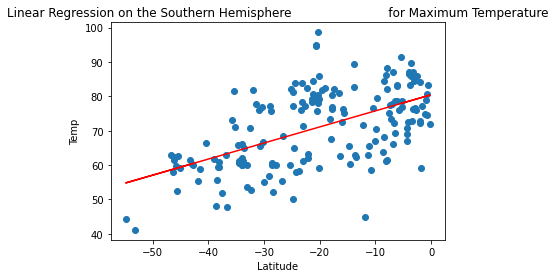

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

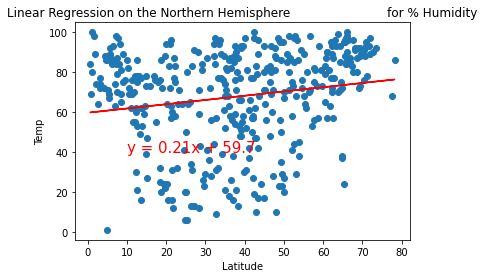

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

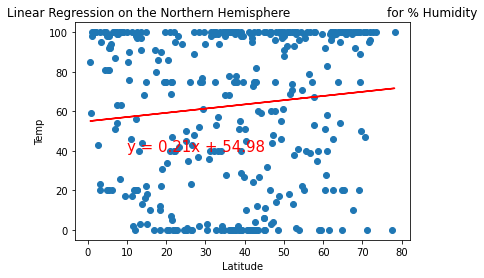

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(40,10))

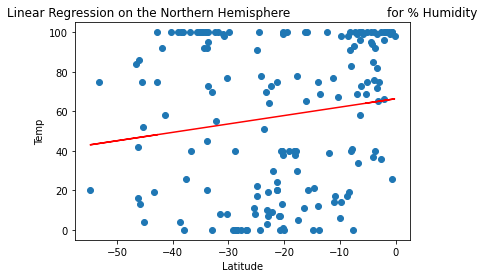

In [50]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(40,10))

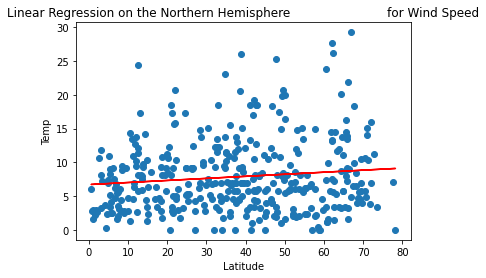

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

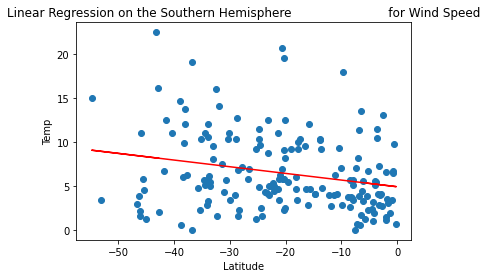

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))